In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install gensim

In [5]:
import gensim
import os

In [13]:
from nltk import sent_tokenize

from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt')
story = []

directory = r'D:\MLProjects\ZDatasets\GameOfThrones'

for filename in os.listdir(directory):
    
    f = open(os.path.join(directory,filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))




[nltk_data] Downloading package punkt to C:\Users\SHIVRAJ
[nltk_data]     SHINDE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
model = gensim.models.Word2Vec(window=10,
                               min_count=2)


In [18]:
model.build_vocab(story)

In [21]:
model.train(story,total_examples=model.corpus_count,epochs=model.epochs)

(6570362, 8628190)

In [22]:
model.wv.most_similar('daenerys')

[('stormborn', 0.7843169569969177),
 ('targaryen', 0.7277637124061584),
 ('unburnt', 0.7267423868179321),
 ('myrcella', 0.7045204043388367),
 ('princess', 0.699819803237915),
 ('queen', 0.6832864284515381),
 ('viserys', 0.6652981042861938),
 ('elia', 0.6586766839027405),
 ('dorne', 0.6571796536445618),
 ('blessed', 0.6338022947311401)]

In [23]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [24]:
model.wv.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

'bronn'

In [25]:
model.wv['king']

array([ 0.54786956,  0.63775986,  2.2018557 ,  0.91845834, -1.9244403 ,
       -1.1451454 ,  0.9396008 ,  1.7108611 , -2.28125   ,  0.00955545,
       -1.2077912 ,  0.07724407,  0.7021997 ,  1.7765024 , -3.717727  ,
       -0.5537699 , -0.56430733,  3.2341342 , -0.38749442,  0.4506742 ,
        1.6027062 ,  0.14815845,  1.2171881 , -3.6805012 , -2.553735  ,
        1.769031  , -1.4758543 , -1.719698  ,  0.7477429 ,  0.39873332,
       -2.6996377 ,  1.4483899 , -0.02152951, -0.4851788 ,  1.8831993 ,
       -3.6925094 , -2.0042796 , -1.8928949 ,  1.9251392 , -2.7506168 ,
       -0.57957214,  2.1347616 ,  2.6883798 , -1.1460608 , -0.862784  ,
       -1.8965204 ,  1.02579   , -2.4412353 ,  3.4493434 , -2.7510695 ,
       -4.2414722 , -0.56352186, -1.1719581 , -3.656248  ,  2.6960764 ,
       -0.49965847,  1.0220097 ,  1.4124794 ,  1.775213  ,  1.5848864 ,
        1.6170241 ,  1.3007342 ,  0.39242727,  1.6095674 ,  0.93966407,
        1.2099836 ,  0.39107355,  0.13119854,  0.6996519 , -0.91

In [27]:
model.wv['king'].shape

(100,)

In [28]:
model.wv.similarity('arya','sansa')

0.8499723

In [29]:
model.wv.similarity('tywin','sansa')

0.29426664

In [30]:
model.wv.get_normed_vectors()

array([[-0.05999792, -0.08351859,  0.15105551, ..., -0.08642261,
         0.00729721,  0.14079095],
       [-0.18519463, -0.20658064,  0.11544541, ..., -0.1088082 ,
        -0.05706937,  0.10692447],
       [ 0.08719271, -0.07663077, -0.11147531, ...,  0.00135966,
         0.11690674, -0.01073432],
       ...,
       [ 0.00964193,  0.09573642, -0.12181988, ..., -0.12309919,
         0.13625503, -0.1100131 ],
       [-0.03148084,  0.08803763,  0.14137073, ...,  0.03557107,
         0.10522334, -0.06964132],
       [-0.07738363,  0.05925011,  0.06759098, ..., -0.04435543,
         0.10078195, -0.0673344 ]], dtype=float32)

In [33]:
y = model.wv.index_to_key
len(y)

17453

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [39]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [40]:
X.shape

(17453, 3)

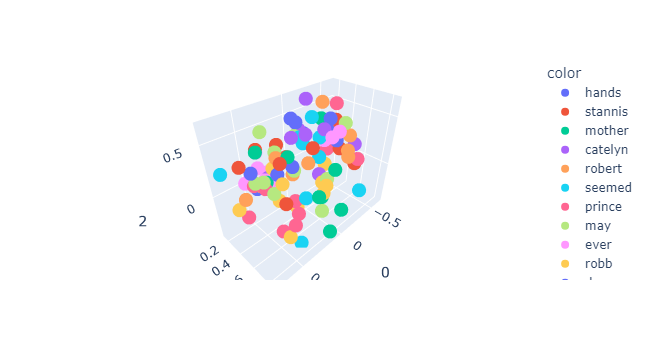

In [45]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()